In [28]:
import os
import pandas as pd
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine
from sqlalchemy import (Column, DateTime, Integer, Numeric, Float, String, Text)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean

In [29]:
np.__version__

'1.12.1'

In [30]:
immport_user = os.getenv("IMMPORT_USER","USER")
immport_password = os.getenv("IMMPORT_PASSWORD","PASSWORD")
immport_database = os.getenv("IMMPORT_DATABASE","DR26")
immport_host = os.getenv("IMMPORT_HOST","127.0.0.1")

In [31]:
conn1 = f"mysql+mysqlconnector://{immport_user}:{immport_password}@{immport_host}:3306/{immport_database}"
immportConn = create_engine(conn1, connect_args={'connect_timeout': 120 }, echo=False)


In [32]:
sql = f'''
SELECT va.subject_accession, va.study_accession, va.study_time_collected,  va.value_preferred, va.virus_strain_preferred
FROM vaccine_analysis va
ORDER BY va.subject_accession, va.study_accession, va.virus_strain_preferred, va.study_time_collected
'''

hai_result = pd.read_sql(sql, immportConn)


# print(hai_result['virus_strain_preferred'], hai_result['subject_accession'])


,subject_accession,study_accession,study_time_collected,value_preferred,virus_strain_preferred
0,SUB112832,SDY269,0.0,20.0,A/Brisbane/59/2007
1,SUB112832,SDY269,28.0,20.0,A/Brisbane/59/2007
2,SUB112832,SDY269,0.0,5.0,A/Uruguay/716/2007
3,SUB112832,SDY269,28.0,5.0,A/Uruguay/716/2007
4,SUB112832,SDY269,0.0,5.0,B/Brisbane/03/2007
5,SUB112832,SDY269,28.0,5.0,B/Brisbane/03/2007
6,SUB112832,SDY61,0.0,40.0,A/Solomon Islands/3/2006
7,SUB112832,SDY61,28.0,640.0,A/Solomon Islands/3/2006
8,SUB112832,SDY61,0.0,5.0,A/Wisconsin/67/2005
9,SUB112832,SDY61,28.0,160.0,A/Wisconsin/67/2005


In [ ]:
def outliers(data):
    (q30,q50,q70) = np.percentile(data, [30, 50, 70])
    iqr = q70 - q30
    mild_upper = (iqr * 1.5) + q70
    mild_lower = q25 - (iqr * 1.5)
    extreme_upper = (iqr * 3.0) + q70
    extreme_lower = q30 - (iqr * 3.0) 
    return {
        "mild_lower": mild_lower,
        "mild_upper": mild_upper,
        "extreme_lower": extreme_lower,
        "extreme_upper": extreme_upper
    }


In [33]:
hai_result['study_accession'].unique()

array(['SDY269', 'SDY61', 'SDY112', 'SDY311', 'SDY312', 'SDY315', 'SDY478',
       'SDY113', 'SDY305', 'SDY472', 'SDY198', 'SDY200', 'SDY196',
       'SDY197', 'SDY199', 'SDY201', 'SDY296', 'SDY301', 'SDY212',
       'SDY314', 'SDY369', 'SDY372', 'SDY376', 'SDY645', 'SDY406', 'SDY515'], dtype=object)

In [34]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
//     return true;

}

<IPython.core.display.Javascript object>

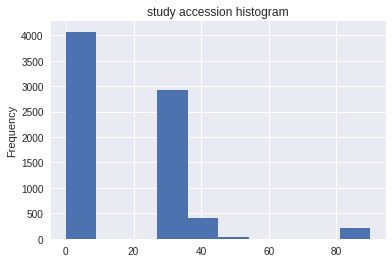

In [37]:
studies = sorted(hai_result['study_accession'].unique())
plt.figure();
hai_result['study_time_collected'].plot.hist(title='study accession histogram', rot = 0)
plt.show();
plt.close()

In [38]:
print((sorted(hai_result['study_accession'].unique())) )
print(len(sorted(hai_result['subject_accession'].unique())) )
print(len(sorted(hai_result['study_time_collected'].unique())) )

['SDY112', 'SDY113', 'SDY196', 'SDY197', 'SDY198', 'SDY199', 'SDY200', 'SDY201', 'SDY212', 'SDY269', 'SDY296', 'SDY301', 'SDY305', 'SDY311', 'SDY312', 'SDY314', 'SDY315', 'SDY369', 'SDY372', 'SDY376', 'SDY406', 'SDY472', 'SDY478', 'SDY515', 'SDY61', 'SDY645']
299
27


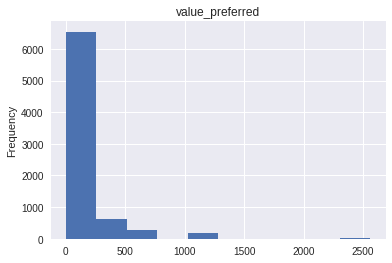

In [39]:
studies = sorted(hai_result['study_accession'].unique())

plt.figure();
histo = hai_result['value_preferred'].plot.hist(title='value_preferred')
plt.show();
plt.close()

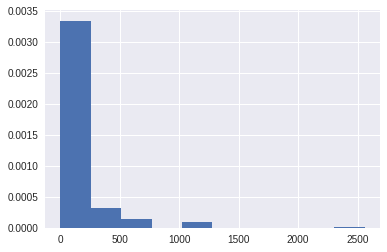

In [40]:
plt.hist(hai_result['value_preferred'], normed = True)
plt.show()
plt.close()


In [41]:
%%time
studies = sorted(hai_result['study_accession'].unique())
day0 = pd.DataFrame(index=hai_result.index, columns=hai_result.columns)
for study in studies:
#     print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
#         print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                hold = data[data['study_time_collected']==0]
                
                # print(day0)


CPU times: user 12.3 s, sys: 88 ms, total: 12.4 s
Wall time: 12.4 s


In [42]:
day0 = hai_result.loc[hai_result['virus_strain_preferred'] == 0]

In [43]:
strains

['A/California/7/2009',
 'A/Victoria/361/2011',
 'B/Brisbane/60/2008',
 'B/Massachusetts/02/2012']

In [44]:
ran_study = hai_result.sample(frac=0.05)
import random


In [45]:
studies = sorted(hai_result['study_accession'].unique())
#sample 30% of the studies
samples = int( float(len(studies)) * 0.3 )
studies = np.random.choice(studies, samples)
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))

studies

array(['SDY113', 'SDY296', 'SDY312', 'SDY212', 'SDY315', 'SDY269', 'SDY376'], 
      dtype='<U6')

		=========== SDY113 ===========
-------------------------- A/California/7/2009  at day 0--------------------------


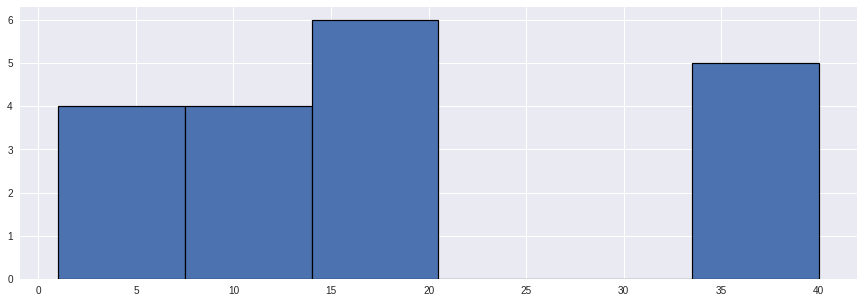

bins:  [  1.    7.5  14.   20.5  27.   33.5  40. ]
n:  [ 4.  4.  6.  0.  0.  5.]
check these out :  14.587906551107999 20.0
and here it is:  501    0.000000
521   -1.302449
540    0.000000
560   -1.302449
574   -1.302449
586    0.000000
598   -0.685499
618   -1.302449
638    1.370999
652   -0.685499
666   -0.685499
672    0.000000
686    1.370999
706    0.000000
718    1.370999
727   -0.685499
733    0.000000
745    1.370999
751    1.370999
Name: adj_mfc, dtype: float64
----------------------------real shit----------------------------------


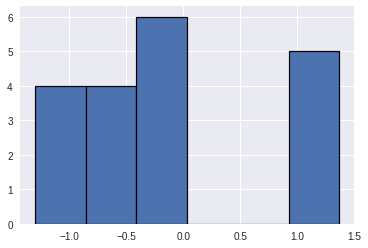

-------------------------- A/California/7/2009  whole time course--------------------------


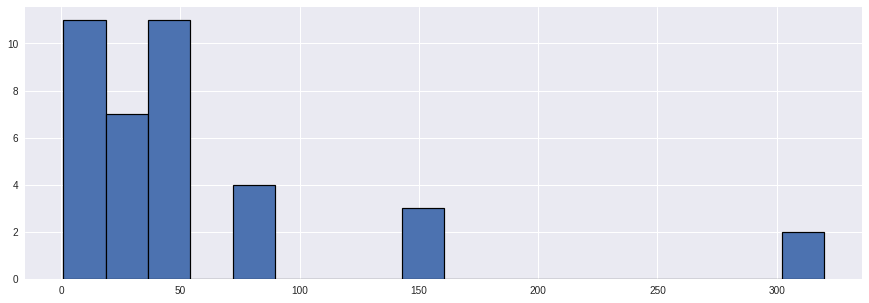

##############################################################################

-------------------------- A/Perth/16/2009  at day 0--------------------------


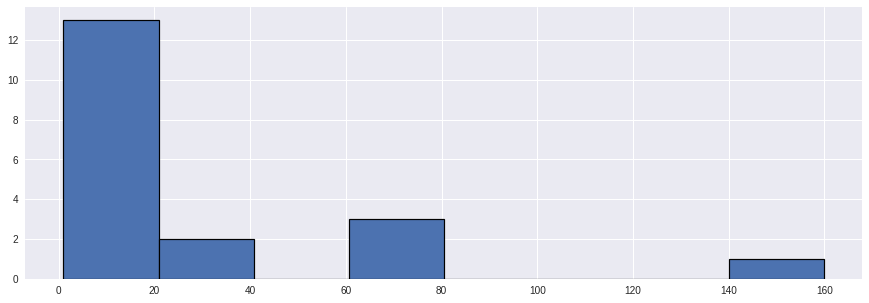

bins:  [   1.      20.875   40.75    60.625   80.5    100.375  120.25   140.125
  160.   ]
n:  [ 13.   2.   0.   3.   0.   0.   0.   1.]
check these out :  40.168067967111966 20.0
and here it is:  503    0.000000
523   -0.248954
542    0.000000
562   -0.473013
576   -0.473013
588    1.493724
600   -0.248954
620   -0.248954
640    0.497908
654   -0.473013
668   -0.248954
674    0.497908
688    1.493724
708    0.000000
720    1.493724
729    0.000000
735    3.485356
747    0.000000
753    0.000000
Name: adj_mfc, dtype: float64
----------------------------real shit----------------------------------


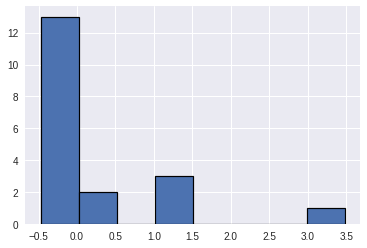

-------------------------- A/Perth/16/2009  whole time course--------------------------


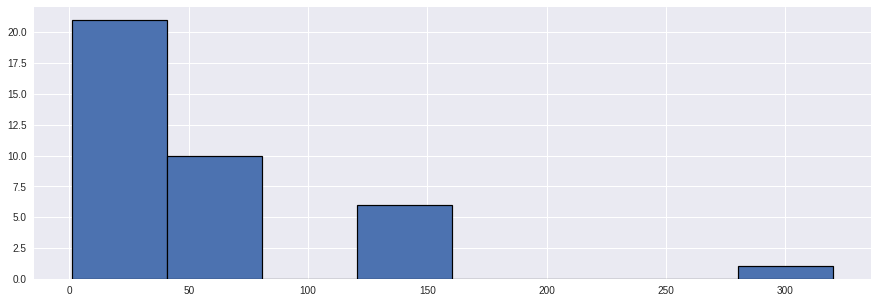

##############################################################################

-------------------------- B/Brisbane/60/2008  at day 0--------------------------


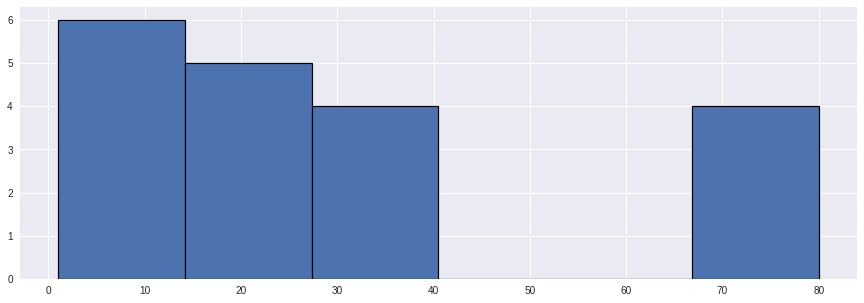

bins:  [  1.          14.16666667  27.33333333  40.5         53.66666667
  66.83333333  80.        ]
n:  [ 6.  5.  4.  0.  0.  4.]
check these out :  28.407436634451038 20.0
and here it is:  505    0.704041
525   -0.352020
544    0.000000
564   -0.668839
578   -0.668839
590    2.112123
602    0.000000
622   -0.668839
642    0.704041
656   -0.352020
670   -0.352020
676    0.000000
690    2.112123
710    0.704041
722    2.112123
731    0.000000
737    2.112123
749    0.000000
755    0.704041
Name: adj_mfc, dtype: float64
----------------------------real shit----------------------------------


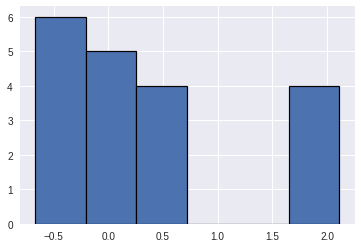

-------------------------- B/Brisbane/60/2008  whole time course--------------------------


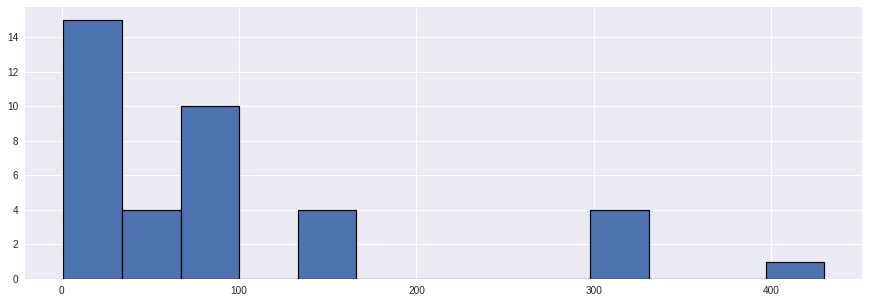

##############################################################################

		=========== SDY296 ===========
-------------------------- A/California/7/2009  at day 0--------------------------


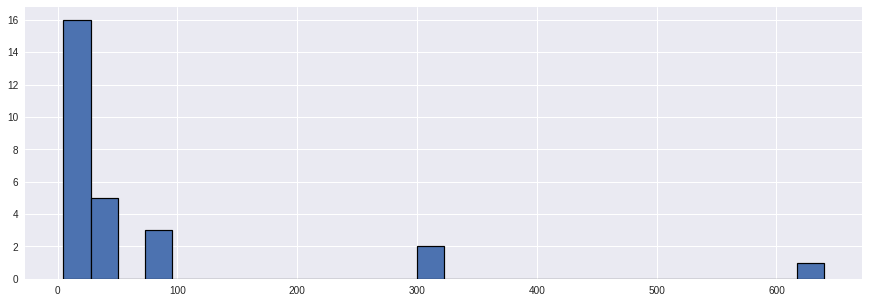

bins:  [   5.           27.67857143   50.35714286   73.03571429   95.71428571
  118.39285714  141.07142857  163.75        186.42857143  209.10714286
  231.78571429  254.46428571  277.14285714  299.82142857  322.5
  345.17857143  367.85714286  390.53571429  413.21428571  435.89285714
  458.57142857  481.25        503.92857143  526.60714286  549.28571429
  571.96428571  594.64285714  617.32142857  640.        ]
n:  [ 16.   5.   0.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
check these out :  141.38987540165974 5.0
and here it is:  1732    0.000000
1756    0.530448
1780    0.000000
1804    0.000000
1810    0.000000
1834    0.247542
1858    0.000000
1882    0.247542
1906    0.247542
1930    0.000000
1954    0.000000
1978    0.000000
2002    0.247542
2026    0.247542
2050    2.227882
2074    0.035363
2098    0.530448
2122    0.000000
2146    0.106090
2170    0.000000
2194    0.000000
2218    0.000000
2242   

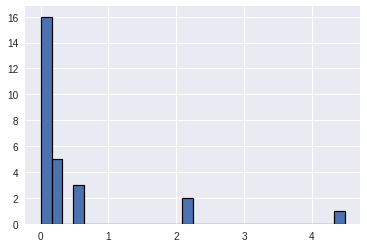

-------------------------- A/California/7/2009  whole time course--------------------------


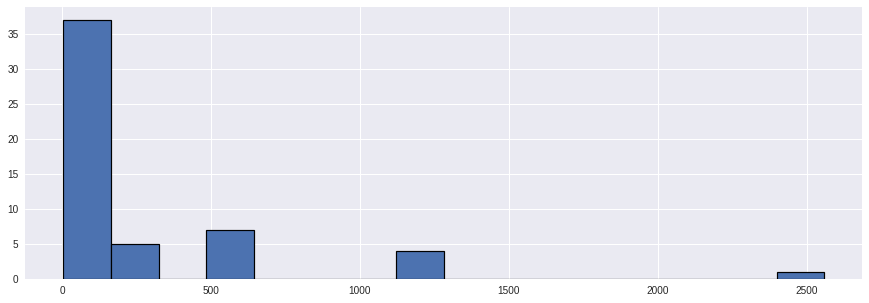

##############################################################################

-------------------------- A/Perth/16/2009  at day 0--------------------------


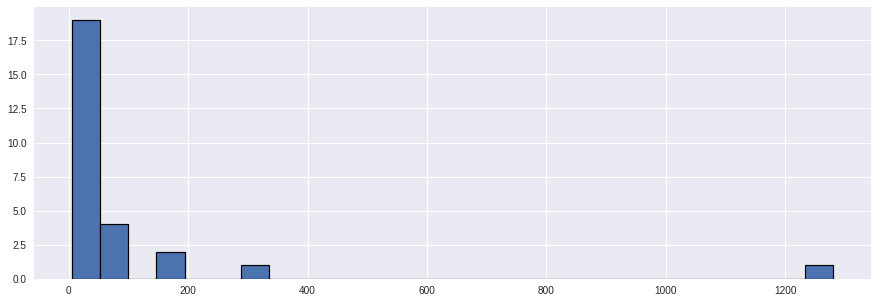

bins:  [    5.            52.22222222    99.44444444   146.66666667   193.88888889
   241.11111111   288.33333333   335.55555556   382.77777778   430.
   477.22222222   524.44444444   571.66666667   618.88888889   666.11111111
   713.33333333   760.55555556   807.77777778   855.           902.22222222
   949.44444444   996.66666667  1043.88888889  1091.11111111  1138.33333333
  1185.55555556  1232.77777778  1280.        ]
n:  [ 19.   4.   0.   2.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
check these out :  245.98456162614056 40.0
and here it is:  1734    0.000000
1758    0.162612
1782    0.000000
1806    0.000000
1812   -0.142285
1836   -0.142285
1860   -0.142285
1884   -0.081306
1908    0.000000
1932    0.000000
1956   -0.121959
1980   -0.142285
2004    5.040967
2028    1.138283
2052    0.487835
2076   -0.142285
2100    0.162612
2124   -0.142285
2148    0.487835
2172   -0.121959
2196   -0.142285
2220    0.16261

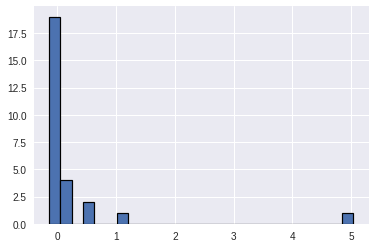

-------------------------- A/Perth/16/2009  whole time course--------------------------


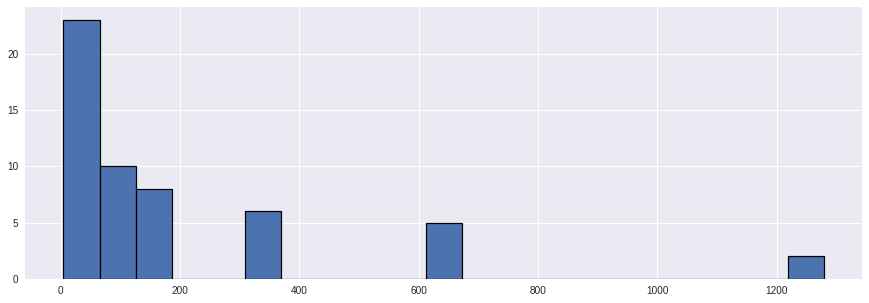

##############################################################################

-------------------------- B/Brisbane/60/2008  at day 0--------------------------


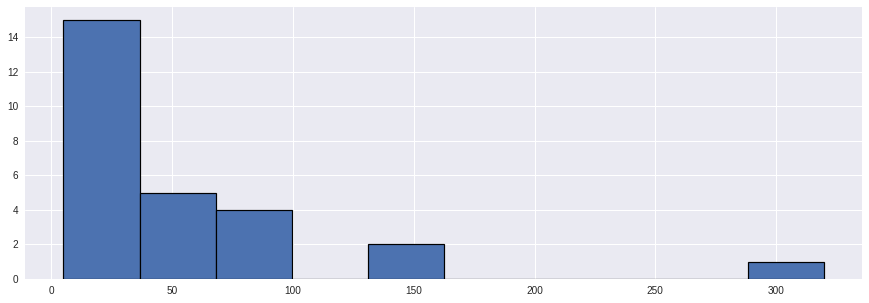

bins:  [   5.    36.5   68.    99.5  131.   162.5  194.   225.5  257.   288.5
  320. ]
n:  [ 15.   5.   4.   0.   2.   0.   0.   0.   0.   1.]
check these out :  69.31440816660833 20.0
and here it is:  1736    0.865621
1760    0.288540
1784    0.288540
1808    0.288540
1814    2.019782
1838   -0.216405
1862   -0.144270
1886    0.288540
1910   -0.144270
1934   -0.216405
1958   -0.144270
1982   -0.216405
2006    4.328104
2030    0.865621
2054    0.865621
2078    0.000000
2102   -0.216405
2126    0.000000
2150    0.000000
2174   -0.216405
2198   -0.144270
2222    0.865621
2246   -0.216405
2270    2.019782
2294   -0.144270
2318    0.000000
2342    0.288540
Name: adj_mfc, dtype: float64
----------------------------real shit----------------------------------


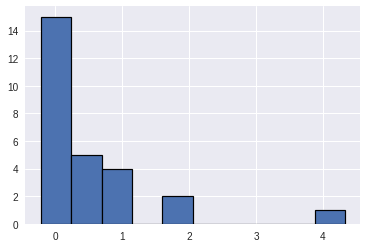

-------------------------- B/Brisbane/60/2008  whole time course--------------------------


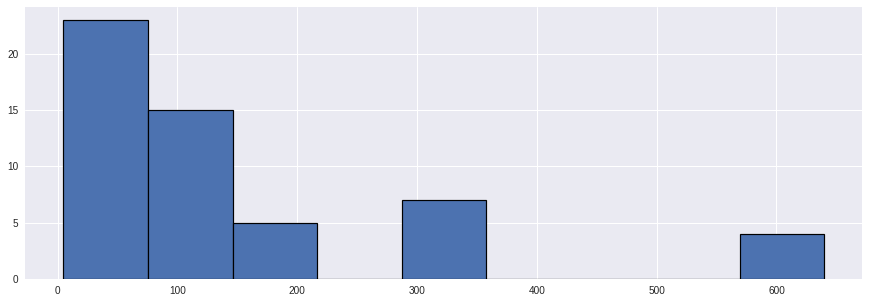

##############################################################################

		=========== SDY312 ===========
-------------------------- A/South Dakota/06/2007  at day 0--------------------------


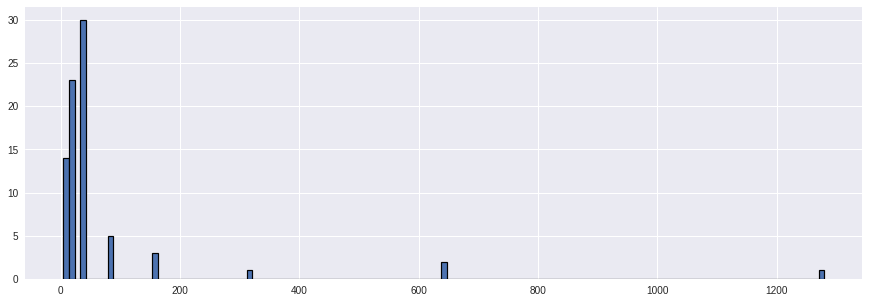

bins:  [    5.            14.30656934    23.61313869    32.91970803    42.22627737
    51.53284672    60.83941606    70.1459854     79.45255474    88.75912409
    98.06569343   107.37226277   116.67883212   125.98540146   135.2919708
   144.59854015   153.90510949   163.21167883   172.51824818   181.82481752
   191.13138686   200.4379562    209.74452555   219.05109489   228.35766423
   237.66423358   246.97080292   256.27737226   265.58394161   274.89051095
   284.19708029   293.50364964   302.81021898   312.11678832   321.42335766
   330.72992701   340.03649635   349.34306569   358.64963504   367.95620438
   377.26277372   386.56934307   395.87591241   405.18248175   414.48905109
   423.79562044   433.10218978   442.40875912   451.71532847   461.02189781
   470.32846715   479.6350365    488.94160584   498.24817518   507.55474453
   516.86131387   526.16788321   535.47445255   544.7810219    554.08759124
   563.39416058   572.70072993   582.00729927   591.31386861   600.62043796
   609

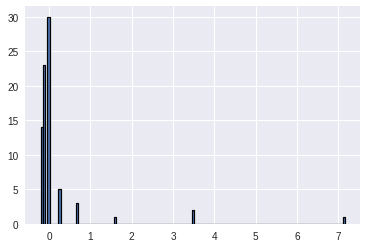

In [ ]:
%%time

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]
        if data.empty:
            continue
        day0 = data[data['study_time_collected'] == 0]
        plt.figure(figsize=(15,5));
#         plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=10) )

        (q30,q50,q70) = np.percentile(data['value_preferred'], [30, 50, 70])

        #print day 0
        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        print('--------------------------', strain, ' at day 0--------------------------')
        plt.show();
        plt.close()
        print('bins: ', bins)
        print('n: ', n)
        
        #apply the adjustment of ([titer]- median[day0]) / standard_deviation[day0] )
        std_day0 = day0['value_preferred'].std()
        med_day0 = day0['value_preferred'].median()
        
        temp['adj_mfc'] = day0['value_preferred'].sub(med_day0).div(std_day0)
        print('check these out : ', std_day0, med_day0)
        a = temp['adj_mfc'].dropna()
        print('and here it is: ', a)
        print('----------------------------real shit----------------------------------')
        plt.figure(figsize=(15,5));

        n, bins, patches = plt.hist(a, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        plt.show();
        plt.close()
        
        #print whole time study
        plt.figure(figsize=(15,5));
        n, bins, patches = plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        print('--------------------------', strain, ' whole time course--------------------------')
        plt.show();
        plt.close()
#         print('num of bins: ', len(bins) )
#         print('n: ', n)
        
        print('##############################################################################\n')
        
        
#         print('values: ', day0['value_preferred'])


Graph the bin of each virus strain in every study.

In [ ]:
%%time
#non-test cell.. test cell above
studies = sorted(hai_result['study_accession'].unique())
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    for strain in strains:
        data = df[df['virus_strain_preferred']==strain]
        if data.empty:
            continue
        day0 = data[data['study_time_collected'] == 0]
        plt.figure(figsize=(15,5));
#         plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=10) )

        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, '--------------------------')
        plt.show();
        plt.close()
        print('bins: ', bins)
        print('n: ', n)
#         print('values: ', day0['value_preferred'])


%%time

studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')



%%time
use this one for inspiration
studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')

'''
temp = pd
for i in hai_result:
    iterate thru hai result
    check if the day is 0 
        if so change the list of values
        if not, add the values to the list
    get geometric mean of the list 
    add that to the studies page
    litlit
'''
studies = sorted(hai_result['study_accession'].unique())
means = []

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
#         print(subject['study_accession'])
        temp = df[df['subject_accession']]